In [3]:
from astroquery.vizier import Vizier

In [4]:
%%time
Open_cluster_data_  = Vizier(catalog="J/A+A/650/A67/clusters",row_limit=-1).query_constraints()
Blue_stragglers_in_open_clusters = Vizier(catalog="J/A+A/650/A67/bss",row_limit=-1).query_constraints()
Parameters_of_clusters_with_blue_stragglers = Vizier(catalog="J/A+A/672/A81/table1",row_limit=-1).query_constraints()
#Parameters_of_cluster_members,_including_BS,_pBS_and_YSS = Vizier(catalog="J/A+A/672/A81/table2",row_limit=-1).query_constraints()


CPU times: total: 78.1 ms
Wall time: 113 ms


In [9]:
table_open_cluster_data_ = Open_cluster_data_[0]
table_Blue_stragglers_in_open_clusters = Blue_stragglers_in_open_clusters[0]
table_Parameters_of_clusters_with_blue_stragglers = Parameters_of_clusters_with_blue_stragglers[0]



Cluster,RAJ2000,DEJ2000,log_Age_,E_B-V_,pmRA,pmDE,plx,Dist,NBSS,NYSS,Notes,SimbadName
,deg,deg,log(yr),mag,mas / yr,mas / yr,mas,pc,,,,
str13,float32,float32,float32,float32,float32,float32,float32,float32,int16,uint8,str1,str23
Berkeley_17,80.130,30.574,10.00,0.580,2.618,-0.350,0.281,3229.7,20,0,,Berkeley 17
Collinder_261,189.519,-68.377,9.95,0.270,-6.351,-2.705,0.315,2903.7,53,3,*,Collinder 261
NGC_6791,290.221,37.778,9.92,0.160,-0.421,-2.269,0.192,4530.8,48,0,*,NGC 6791
Berkeley_39,116.702,-4.665,9.90,0.120,-1.730,-1.645,0.201,4357.3,18,2,*,Berkeley 39
NGC_188,11.798,85.244,9.88,0.036,-2.307,-0.960,0.507,1864.3,22,0,,NGC 188
Berkeley_20,83.152,0.185,9.78,0.120,0.808,-0.244,0.040,14402.1,6,3,,Berkeley 20
King_2,12.741,58.188,9.78,0.310,-1.358,-0.824,0.166,5136.0,26,2,*,King 2
NGC_6253,254.778,-52.712,9.70,0.200,-4.537,-5.280,0.563,1689.7,14,3,,NGC 6253


In [12]:
%%time
data_from_vizier = Vizier(catalog="J/A+A/640/A1",row_limit=-1).query_constraints()
data_from_vizier

CPU times: total: 9.92 s
Wall time: 15 s


TableList with 2 tables:
	'0:J/A+A/640/A1/table1' with 20 column(s) and 2017 row(s) 
	'1:J/A+A/640/A1/nodup' with 16 column(s) and 234128 row(s) 

In [13]:
cluster_list = data_from_vizier[0]
member_list = data_from_vizier[1]

In [15]:
df1 = table_open_cluster_data_.to_pandas()
df2 = cluster_list.to_pandas()


,Cluster,RAJ2000,DEJ2000,log_Age_,E_B-V_,pmRA,pmDE,plx,Dist,NBSS,NYSS,Notes,SimbadName
0,Berkeley_17,80.129997,30.573999,10.00,0.580,2.618,-0.350,0.281,3229.699951,20,0,,Berkeley 17
1,Collinder_261,189.518997,-68.376999,9.95,0.270,-6.351,-2.705,0.315,2903.699951,53,3,*,Collinder 261
2,NGC_6791,290.221008,37.778000,9.92,0.160,-0.421,-2.269,0.192,4530.799805,48,0,*,NGC 6791
3,Berkeley_39,116.702003,-4.665000,9.90,0.120,-1.730,-1.645,0.201,4357.299805,18,2,*,Berkeley 39
4,NGC_188,11.798000,85.244003,9.88,0.036,-2.307,-0.960,0.507,1864.300049,22,0,,NGC 188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,NGC_6451,267.674988,-30.205999,8.13,0.670,-0.105,-1.335,0.304,3002.000000,0,0,,NGC 6451
404,NGC_6664,279.125000,-8.194000,7.16,0.700,-0.089,-2.561,0.468,2011.800049,0,0,,NGC 6664
405,NGC_7086,322.623993,51.592999,8.14,0.800,-1.656,-1.629,0.590,1616.500000,0,0,,NGC 7086
406,NGC_2645,129.774002,-46.235001,7.42,0.410,-5.887,5.071,0.523,1812.500000,0,0,*,NGC 2645


In [19]:
print(type(cluster_list)) 

<class 'astropy.table.table.Table'>


In [20]:
df1_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 407
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Cluster     400 non-null    object 
 1   RAJ2000     400 non-null    float32
 2   DEJ2000     400 non-null    float32
 3   log_Age_    400 non-null    float32
 4   E_B-V_      400 non-null    float32
 5   pmRA        400 non-null    float32
 6   pmDE        400 non-null    float32
 7   plx         400 non-null    float32
 8   Dist        400 non-null    float32
 9   NBSS        400 non-null    int16  
 10  NYSS        400 non-null    uint8  
 11  Notes       400 non-null    object 
 12  SimbadName  400 non-null    object 
dtypes: float32(8), int16(1), object(3), uint8(1)
memory usage: 26.2+ KB


In [21]:
df2_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 101 to 2009
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Cluster     400 non-null    object 
 1   RA_ICRS     400 non-null    float32
 2   DE_ICRS     400 non-null    float32
 3   r50         400 non-null    float32
 4   nbstars07   400 non-null    int16  
 5   pmRA_       400 non-null    float32
 6   pmDE        400 non-null    float32
 7   plx         400 non-null    float32
 8   Flag        400 non-null    object 
 9   AgeNN       392 non-null    float32
 10  AVNN        392 non-null    float32
 11  DMNN        392 non-null    float32
 12  DistPc      392 non-null    float32
 13  X           392 non-null    float32
 14  Y           392 non-null    float32
 15  Z           392 non-null    float32
 16  Rgc         392 non-null    float32
 17  SimbadName  400 non-null    object 
 18  _RA.icrs    400 non-null    float64
 19  _DE.icrs    400 non-null    flo

In [22]:
# Erstellen der Liste der Clusternamen
cluster_with_blue_strugglers = df1_filtered['Cluster'].tolist()

# Ausgabe der Liste
cluster_with_blue_strugglers

['Berkeley_17',
 'Collinder_261',
 'NGC_6791',
 'Berkeley_39',
 'NGC_188',
 'Berkeley_20',
 'King_2',
 'NGC_6253',
 'Berkeley_32',
 'NGC_1193',
 'Berkeley_70',
 'Berkeley_18',
 'Berkeley_12',
 'Trumpler_5',
 'NGC_7142',
 'Melotte_66',
 'Berkeley_22',
 'NGC_7789',
 'Berkeley_99',
 'NGC_2682',
 'Berkeley_19',
 'NGC_6819',
 'Berkeley_21',
 'Berkeley_31',
 'NGC_2420',
 'NGC_6939',
 'NGC_2112',
 'NGC_1798',
 'NGC_2141',
 'IC_1311',
 'Berkeley_14',
 'Gulliver_55',
 'NGC_2354',
 'NGC_752',
 'Gulliver_4',
 'NGC_2192',
 'Collinder_110',
 'NGC_2658',
 'Ruprecht_75',
 'NGC_2627',
 'Gulliver_1',
 'Trumpler_20',
 'Collinder_74',
 'NGC_3960',
 'King_5',
 'NGC_7044',
 'IC_166',
 'Pismis_18',
 'NGC_6005',
 'NGC_3680',
 'Pismis_2',
 'IC_4651',
 'King_11',
 'NGC_2660',
 'NGC_2204',
 'NGC_2243',
 'Pismis_3',
 'NGC_2158',
 'Berkeley_29',
 'Tombaugh_2',
 'NGC_2849',
 'NGC_6583',
 'NGC_1245',
 'NGC_2506',
 'Berkeley_81',
 'Tombaugh_1',
 'NGC_5822',
 'Berkeley_69',
 'NGC_6134',
 'NGC_6866',
 'NGC_5823',
 'Be

In [23]:
# Neue Spalte hinzufügen, die angibt, ob ein Cluster einen Blue Struggler hat
df2['Blue_Straggler'] = df2['Cluster'].isin(cluster_with_blue_strugglers).astype(int)

df2[15:200]

,Cluster,RA_ICRS,DE_ICRS,r50,nbstars07,pmRA_,pmDE,plx,Flag,AgeNN,...,DMNN,DistPc,X,Y,Z,Rgc,SimbadName,_RA.icrs,_DE.icrs,Blue_Straggler
15,ASCC_13,78.254997,44.417000,0.609,85,-0.473,-1.743,0.898,NN,7.50,...,10.24,1115.0,-1067.0,316.0,60.0,9412.0,[KPR2005] 13,78.255,44.417,0
16,ASCC_16,81.197998,1.655000,0.376,175,1.355,-0.015,2.838,NN,7.13,...,7.69,344.0,-305.0,-118.0,-108.0,8646.0,[KPR2005] 16,81.198,1.655,0
17,ASCC_19,81.982002,-1.987000,0.605,149,1.152,-1.234,2.768,NN,7.02,...,7.70,346.0,-296.0,-137.0,-115.0,8637.0,[KPR2005] 19,81.982,-1.987,0
18,ASCC_21,82.179001,3.527000,0.410,90,1.404,-0.632,2.866,NN,6.95,...,7.66,341.0,-307.0,-111.0,-97.0,8647.0,[KPR2005] 21,82.179,3.527,0
19,ASCC_23,95.046997,46.709999,0.319,120,1.098,-0.598,1.594,NN,8.37,...,9.00,630.0,-595.0,132.0,156.0,8936.0,[KPR2005] 23,95.047,46.710,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Berkeley_81,285.419006,-0.454000,0.044,127,-1.204,-1.853,0.254,NN,9.06,...,12.60,3313.0,2754.0,1836.0,-143.0,5879.0,Cl Berkeley 81,285.419,-0.454,1
196,Berkeley_82,287.845001,13.111000,0.022,23,0.178,-3.168,0.708,NN,8.02,...,10.68,1365.0,933.0,995.0,38.0,7473.0,Cl Berkeley 82,287.845,13.111,1
197,Berkeley_83,300.355988,28.645000,0.013,30,-2.604,-4.692,0.092,NN,8.38,...,14.12,6663.0,2700.0,6091.0,-108.0,8301.0,Cl Berkeley 83,300.356,28.645,0
198,Berkeley_85,304.691986,37.743999,0.057,310,-2.940,-4.677,0.220,NN,8.62,...,12.74,3526.0,871.0,3416.0,61.0,8213.0,Cl Berkeley 85,304.692,37.744,0


In [24]:
member_list

RA_ICRS,DE_ICRS,GaiaDR2,Plx,pmRA_,pmDE,RV,o_Gmag,Gmag,BP-RP,proba,Cluster,Teff50,Simbad,_RA.icrs,_DE.icrs
deg,deg,,mas,mas / yr,mas / yr,km / s,,mag,mag,,,K,,deg,deg
float64,float64,int64,float64,float64,float64,float64,int16,float64,float64,float64,str17,float64,str6,float64,float64
58.14384068368,11.26075026068,36629890579758592,28.598377211962266,176.685799845052827,-8.66674604583512931,--,335,12.6262080,2.5727358,1.00000,Melotte_25,3304.70410156,Simbad,58.14306502050,11.26078757483
59.56042372775,12.62797069843,38329666836450304,21.946148203838629,129.43544721820507,-12.3098653639171651,--,325,15.1111560,3.2145452,1.00000,Melotte_25,2926.90014648,Simbad,59.55985262114,12.62802369863
58.75658414086,12.48554217275,38354680725946240,21.721822994255881,131.227555460096823,-10.2290840289827329,36.3159809099714152580,315,9.7661130,1.2956991,1.00000,Melotte_25,4862.67236328,Simbad,58.75600544748,12.48558621402
58.44437807278,13.39192671281,38670343642226816,24.153702243865073,148.357283332882758,-13.9080532784734441,--,331,14.8321440,3.2003345,1.00000,Melotte_25,2915.78540039,Simbad,58.44372145776,13.39198659386
60.18786450237,13.90626330846,38929141191925760,21.241980830622829,128.29540630275045,-16.1790403778897591,--,366,13.3299740,2.986785,1.00000,Melotte_25,3051.10205078,Simbad,60.18729544011,13.90633296755
60.92600247350,14.99122205563,39305036729495936,24.052709700794892,141.189959131320933,-24.0698230311297365,--,384,15.0388500,-0.12748432,1.00000,Melotte_25,--,Simbad,60.92537315337,14.99132568873
58.72235328058,16.31552394857,40470720915966208,22.731166522828545,134.275203827943386,-22.675896752658943,--,315,12.9574770,2.851059,1.00000,Melotte_25,3112.71997070,Simbad,58.72175089229,16.31562158005
53.14433967637,16.15326441014,42716408993806080,20.533852313612218,141.082307465623273,-14.6922463779179999,32.8128713016390207713,237,12.9808000,2.7437143,1.00000,Melotte_25,3457.01782227,Simbad,53.14370727172,16.15332766749


In [36]:
%%time
import pandas as pd
import numpy as np

binsG = np.linspace(0, 18, 10)
binsBP_RP = np.linspace(-1, 3, 10)


# 1. Zuordnung der Sterne zu Clustern
for index, cluster_name in enumerate(df2['Cluster']):
    # if index<1600:
    #   continue
    cluster_stars = member_list[member_list['Cluster'] == cluster_name]
    N_stars = len(cluster_stars)
    isBSS = df2['Blue_Straggler'][index]

    for rrr in range(20):
        fuzzy_G = cluster_stars['Gmag'] + np.random.normal(loc=0, scale=0.2, size=N_stars)
        fuzzy_BP_RP = cluster_stars['BP-RP'] + np.random.normal(loc=0, scale=0.2, size=N_stars)

        H,_,_ = np.histogram2d(fuzzy_BP_RP, fuzzy_G, bins=10, range=[[-1, 3], [0,18]])
        np.save(f'Histogram_cmd_{cluster_name}_{rrr}_{isBSS}.npy', np.append(H.flatten(),isBSS) )
        
        
        

        
    

CPU times: total: 54.7 s
Wall time: 56.5 s


KeyboardInterrupt: 

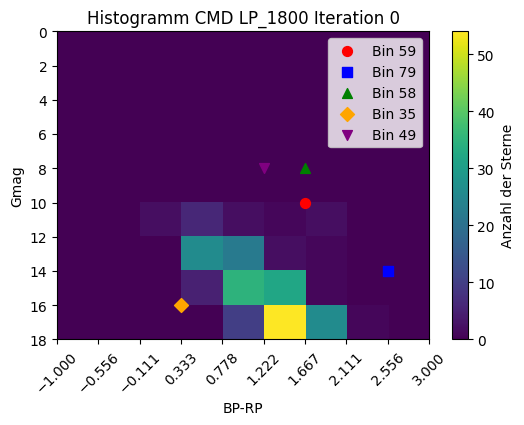

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os



# Definieren der Bins
binsG = np.linspace(0, 18, 10)
binsBP_RP = np.linspace(-1, 3, 10)

# Bins zum Markieren
bins_to_mark = [59, 79, 58, 35, 49]

# Iteration über Cluster
for index, cluster_name in enumerate(df2['Cluster']):
    cluster_stars = member_list[member_list['Cluster'] == cluster_name]
    N_stars = len(cluster_stars)
    isBSS = df2['Blue_Straggler'][index]

    for rrr in range(1):
        fuzzy_G = cluster_stars['Gmag'] + np.random.normal(loc=0, scale=0.2, size=N_stars)
        fuzzy_BP_RP = cluster_stars['BP-RP'] + np.random.normal(loc=0, scale=0.2, size=N_stars)

        # Erstellen des Histogramms
        H, xedges, yedges = np.histogram2d(fuzzy_BP_RP, fuzzy_G, bins=[binsBP_RP, binsG])

        # Speichern der Bin-Grenzen als Textdatei
        output_dir = 'bin_edges'
        os.makedirs(output_dir, exist_ok=True)
        filename = f'{output_dir}/Bin_Edges_cmd_{cluster_name}_{rrr}_{isBSS}.txt'
        np.savetxt(filename, (xedges, yedges), delimiter=',', header='xedges, yedges')

        # Plot erstellen
        plt.figure(figsize=(6, 4))
        plt.imshow(H.T, origin='lower', extent=[binsBP_RP.min(), binsBP_RP.max(), binsG.min(), binsG.max()], aspect='auto')
        plt.colorbar(label='Anzahl der Sterne')
        plt.xlabel('BP-RP')
        plt.ylabel('Gmag')
        plt.title(f'Histogramm CMD {cluster_name} Iteration {rrr}')

        # Achsenbeschriftungen mit Bin-Grenzen
        plt.xticks(xedges, rotation=45)

        # Invertierung der y-Achse
        plt.gca().invert_yaxis()

        # Markierung der Bins im Plot
        colors = ['red', 'blue', 'green', 'orange', 'purple']
        markers = ['o', 's', '^', 'D', 'v']
        sizes = [50, 50, 50, 50, 50]

        for i, bin_num in enumerate(bins_to_mark):
            row_index, col_index = np.unravel_index(bin_num, H.shape)
            plt.scatter(xedges[row_index], yedges[col_index], color=colors[i], marker=markers[i], s=sizes[i], label=f'Bin {bin_num}')

        plt.legend()

        # Speichern als JPEG
        output_dir = 'histogramme_jpeg'
        os.makedirs(output_dir, exist_ok=True)
        filename = f'{output_dir}/Histogram_cmd_{cluster_name}_{rrr}_{isBSS}.jpeg'
        plt.savefig(filename, format='jpeg', dpi=300)
        plt.close()
